## 新能源电动汽车动力电池充电能量预测（五）——数据拆分，前75%为训练集，后25%为测试集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import date, datetime
from package import utils
import time
from scipy import stats

### 定义数据处理的类型：1.with_fill（使用填充数据）；2.without_fill（不使用填充数据）

In [2]:
type = 1

### 导入数据

In [3]:
# 导入经过填充之后的数据集合
path = 'whole/filled_by_kmeans'
if type == 2:
    path = 'perfect'
dataset = pd.read_csv('./energy_predict_data/data_prehandle/4_fill_null/%s/predict_data_e_train.csv' % path)
# 数据字段
header = dataset.columns.values.tolist()
# 数据集大小
count = (int)(np.max(dataset['vehicle_id']))
# 数据描述
pd.set_option('precision', 2)
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,5990.00,5.99e+03,5.99e+03,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5980.00,5990.00,5980.00,5990.00,5990.00,5990.00,5990.00
mean,11.37,2.02e+13,2.02e+13,7178.32,103588.11,102.27,35.57,76.56,40.99,405.94,436.13,-43.74,-22.32,27.19,15.18,12.04,25.94
std,6.45,4.00e+09,4.00e+09,8366.48,30819.13,64.72,19.37,26.82,22.35,91.53,87.88,48.22,35.36,10.62,11.55,9.95,21.24
min,1.00,2.02e+13,2.02e+13,600.00,45631.70,0.00,0.00,4.80,0.00,252.30,0.00,-202.00,-400.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2168.25,78704.15,63.10,20.80,55.25,22.40,340.40,374.60,-59.80,-20.40,18.00,5.00,6.00,12.64
50%,11.00,2.02e+13,2.02e+13,3861.00,97276.05,93.25,34.00,87.00,40.00,361.50,391.60,-24.00,-9.30,30.00,14.00,9.00,19.61
75%,17.00,2.02e+13,2.02e+13,6429.00,122780.75,132.78,47.00,100.00,61.00,533.70,551.70,-9.00,-5.00,35.00,25.00,12.00,29.56
max,21.00,2.02e+13,2.02e+13,59960.00,182536.00,490.00,96.00,110.49,99.00,574.60,604.70,-0.10,8.00,52.00,46.00,51.00,103.72


### 数据拆分

In [4]:
dataset_train = pd.DataFrame(columns=header)
dataset_test = pd.DataFrame(columns=header)
for i in range(1, count+1):
    data_vehicle = dataset[dataset['vehicle_id'] == i]
    index_list = data_vehicle.index.tolist()
    data_train = data_vehicle.loc[index_list[0:int(0.75*len(data_vehicle))]].copy()
    data_test = data_vehicle.loc[index_list[int(0.75*len(data_vehicle)):len(data_vehicle)]].copy()
    dataset_train = dataset_train.append(data_train)
    dataset_test = dataset_test.append(data_test)

#### 训练集数据

In [5]:
dataset_train.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,4484.00,4.48e+03,4.48e+03,4484.00,4484.00,4484.00,4484.00,4484.00,4484.00,4484.00,4477.00,4484.00,4477.00,4484.00,4484.00,4484.00,4484.00
mean,11.37,2.02e+13,2.02e+13,7150.37,98427.96,102.83,34.54,75.39,40.85,405.75,436.77,-43.88,-22.75,24.93,12.72,12.23,26.15
std,6.45,4.31e+09,4.30e+09,8418.98,29671.80,65.48,19.35,28.48,22.66,92.12,88.21,48.14,35.78,10.01,10.35,9.26,21.00
min,1.00,2.02e+13,2.02e+13,600.00,45631.70,0.00,0.00,4.80,0.40,252.30,0.00,-202.00,-400.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2170.00,74701.00,62.90,19.20,40.00,22.00,339.60,374.50,-60.40,-21.90,16.00,4.00,7.00,12.98
50%,11.00,2.02e+13,2.02e+13,3870.00,90477.65,93.50,33.00,88.26,39.60,361.40,392.40,-24.20,-11.50,27.00,10.00,10.00,19.81
75%,17.00,2.02e+13,2.02e+13,5920.00,117295.25,133.00,45.00,100.00,61.20,533.80,554.20,-9.10,-5.00,33.00,23.00,13.00,30.13
max,21.00,2.02e+13,2.02e+13,59960.00,170134.00,490.00,96.00,108.49,99.00,574.60,604.70,-0.10,8.00,49.00,41.00,48.00,103.72


#### 测试集数据

In [6]:
dataset_test.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,1506.00,1.51e+03,1.51e+03,1506.00,1506.00,1506.00,1506.00,1506.00,1506.00,1506.00,1503.00,1506.00,1503.00,1506.00,1506.00,1506.00,1506.00
mean,11.37,2.02e+13,2.02e+13,7261.55,118952.06,100.59,38.66,80.04,41.38,406.52,434.21,-43.31,-21.05,33.95,22.49,11.48,25.30
std,6.45,1.22e+09,1.22e+09,8210.35,29011.07,62.40,19.08,20.75,21.40,89.76,86.91,48.46,34.05,9.46,11.84,11.75,21.92
min,1.00,2.02e+13,2.02e+13,600.00,75285.20,0.00,1.00,11.00,0.00,277.80,0.00,-202.00,-300.00,3.00,-2.00,0.00,0.42
25%,5.00,2.02e+13,2.02e+13,2160.00,93429.15,63.30,23.00,72.76,24.00,342.20,374.60,-54.08,-18.40,30.00,15.00,6.00,11.65
50%,11.00,2.02e+13,2.02e+13,3843.50,114175.00,93.00,36.00,86.00,40.00,361.80,388.30,-24.00,-8.50,35.00,26.00,8.00,18.86
75%,17.00,2.02e+13,2.02e+13,8391.00,136668.00,130.75,52.00,98.00,60.52,533.60,548.00,-9.00,-5.00,40.00,31.00,10.00,28.27
max,21.00,2.02e+13,2.02e+13,44535.00,182536.00,441.40,93.00,110.49,95.00,571.00,601.40,-0.10,3.90,52.00,46.00,51.00,101.30


### 数据分布

#### 训练集数据分布

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.60751743, -3.37047581, -3.239742  , ...,  3.239742  ,
          3.37047581,  3.60751743]),
  array([   0.217,    0.413,    0.413, ...,  102.7  ,  103.674,  103.722])),
 (19.101761181371881, 26.151623796615603, 0.90891551121484793))

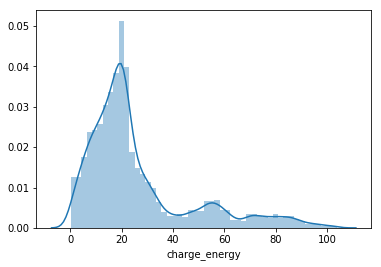

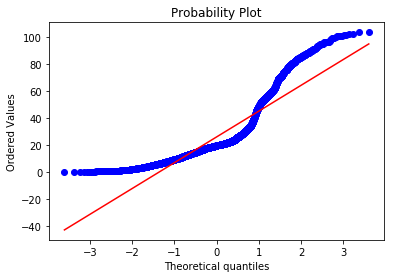

In [7]:
fig = plt.figure()
sns.distplot(dataset_train[dataset_train['charge_energy'].notnull()]['charge_energy']);
fig = plt.figure()
stats.probplot(dataset_train[dataset_train['charge_energy'].notnull()]['charge_energy'], plot=plt)

####  测试集数据分布

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.3138215 , -3.05723987, -2.91459063, ...,  2.91459063,
          3.05723987,  3.3138215 ]),
  array([   0.424,    0.424,    0.482, ...,   98.98 ,   99.641,  101.301])),
 (19.600519708391634, 25.300798884310908, 0.89262796172503733))

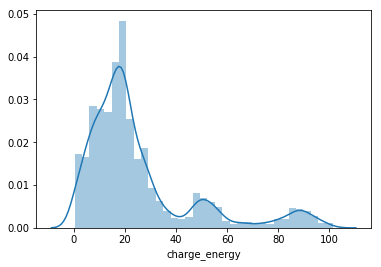

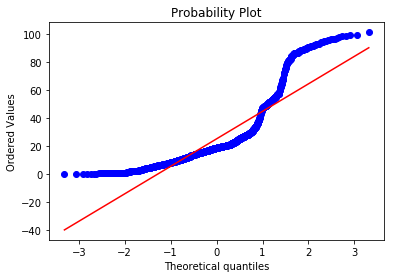

In [8]:
fig = plt.figure()
sns.distplot(dataset_test[dataset_test['charge_energy'].notnull()]['charge_energy']);
fig = plt.figure()
stats.probplot(dataset_test[dataset_test['charge_energy'].notnull()]['charge_energy'], plot=plt)

>观察：训练、测试集合都近似正态分布

### 保存训练集和测试集

In [9]:

dataset_train.to_csv('./energy_predict_data/data_prehandle/5_data_split/train/train_%s.csv' % utils.getType(type), index = False)
dataset_test.to_csv('./energy_predict_data/data_prehandle/5_data_split/test/test_%s.csv' % utils.getType(type), index = False)